# Custom KDE plot in matplotlib

In [2]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [3]:
rs = np.random.RandomState(8)
Nsample = 30
N = 500
x = np.linspace(0, 1.0, Nsample)
y = np.empty((N, Nsample))
for i in range(N):
    y[i] = np.sin(x*(2*np.pi)) + 0.25 * rs.normal(0, 1.0, 30) + rs.binomial(2, 0.3)

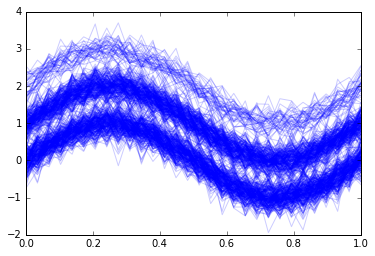

In [4]:
lines = plt.plot(x, y.T, color='b', alpha=0.2)

In [5]:
from scipy import stats

def kdeplot(x, y, color='b', alphamax=1.0, ax=None):
    if ax is None:
        ax = plt.gca()
    kde_data = []
    y_min, y_max = y.min(), y.max()
    y_vals = np.linspace(y_min, y_max, len(y))
    for pt_data in y.T:
        pt_kde = stats.kde.gaussian_kde(pt_data)
        kde_data.append(pt_kde(y_vals))
    kde_data = np.transpose(kde_data)
    rgb = colors.ColorConverter().to_rgb(color)
    img = np.zeros((kde_data.shape[0], kde_data.shape[1], 4))
    img[:, :, :3] = rgb
    kde_data /= kde_data.max(axis=0)
    img[:, :, 3] = kde_data * alphamax
    ax.imshow(img, interpolation="bicubic",
              extent=(x.min(), x.max(), y_min, y_max),
              aspect="auto", origin="lower")

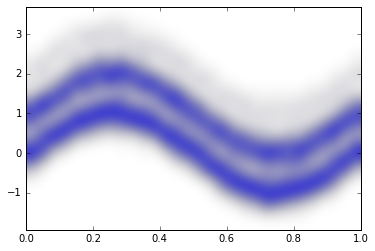

In [6]:
kdeplot(x, y, alphamax = 0.75)